In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

#### Read data

In [2]:
df = pd.read_parquet("../datasets/train.parquet")
df.head()

,seq_ix,step_in_seq,need_prediction,0,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,-0.080082,1.324564,0.637730,-1.091486,-0.859104,1.291364,-1.046394,...,0.876881,-1.425938,-0.104571,1.253508,-1.155514,-0.907224,1.361777,0.602751,1.265182,-0.495940
1,0,1,0,-1.243274,0.398425,-1.810485,-0.427042,0.303473,0.304587,-0.392796,...,0.669286,-0.720985,-1.144171,0.724269,-1.259564,0.181201,0.529757,-0.076843,1.111895,-1.171435
2,0,2,0,-0.124680,1.225580,0.139482,-0.967710,-0.769101,1.208697,-1.218701,...,0.742988,-1.381406,0.043121,1.205969,-1.062414,-0.739191,1.266046,0.856712,1.205016,-0.417057
3,0,3,0,-1.264455,0.494485,-1.041663,-0.587907,0.203893,0.437923,-0.479116,...,0.808542,-0.777047,-1.163911,0.801497,-1.280313,-0.090955,0.636906,-0.213926,1.121746,-1.364489
4,0,4,0,-0.882663,-0.223168,-1.229349,0.029471,0.459377,-0.232340,0.113789,...,0.286553,-0.114436,-0.730509,0.301325,-0.782454,0.486104,-0.172012,-0.016936,0.674722,-0.740237


#### Dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517000 entries, 0 to 516999
Data columns (total 35 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   seq_ix           517000 non-null  int64  
 1   step_in_seq      517000 non-null  int64  
 2   need_prediction  517000 non-null  int64  
 3   0                517000 non-null  float64
 4   1                517000 non-null  float64
 5   2                517000 non-null  float64
 6   3                517000 non-null  float64
 7   4                517000 non-null  float64
 8   5                517000 non-null  float64
 9   6                517000 non-null  float64
 10  7                517000 non-null  float64
 11  8                517000 non-null  float64
 12  9                517000 non-null  float64
 13  10               517000 non-null  float64
 14  11               517000 non-null  float64
 15  12               517000 non-null  float64
 16  13               517000 non-null  floa

#### Columns statistics

In [4]:
df.describe()

,seq_ix,step_in_seq,need_prediction,0,1,2,3,4,5,6,...,22,23,24,25,26,27,28,29,30,31
count,517000.00000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,...,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000,517000.000000
mean,258.00000,499.500000,0.899000,0.001247,0.022680,-0.006079,-0.013578,-0.001519,0.006435,-0.022507,...,0.021797,-0.015975,-0.010245,0.003196,-0.022505,-0.021408,0.021334,-0.007824,0.006495,-0.018510
std,149.24491,288.675269,0.301329,0.985162,0.994129,1.008178,1.010985,0.990943,0.989856,1.001293,...,0.989687,0.989816,0.991879,0.997269,0.997177,0.996491,0.995721,0.996676,1.002600,1.001944
min,0.00000,0.000000,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-3.400935,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,129.00000,249.750000,1.000000,-0.672111,-0.655956,-0.680784,-0.703100,-0.684677,-0.668105,-0.709381,...,-0.666198,-0.696765,-0.671657,-0.679927,-0.688384,-0.697000,-0.655391,-0.694185,-0.658455,-0.684046
50%,258.00000,499.500000,1.000000,-0.003134,0.013809,-0.006287,-0.020027,-0.003576,0.009730,-0.018166,...,0.030758,-0.010643,-0.006489,0.011550,-0.013160,-0.004827,0.017762,-0.012549,0.008081,-0.012764
75%,387.00000,749.250000,1.000000,0.655925,0.698124,0.663186,0.661700,0.670718,0.685277,0.669402,...,0.687280,0.663009,0.650527,0.684317,0.651541,0.652707,0.700777,0.669457,0.680425,0.643227
max,516.00000,999.000000,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,...,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


#### Number of sequences

In [5]:
df['seq_ix'].nunique()

517

#### First sequence features

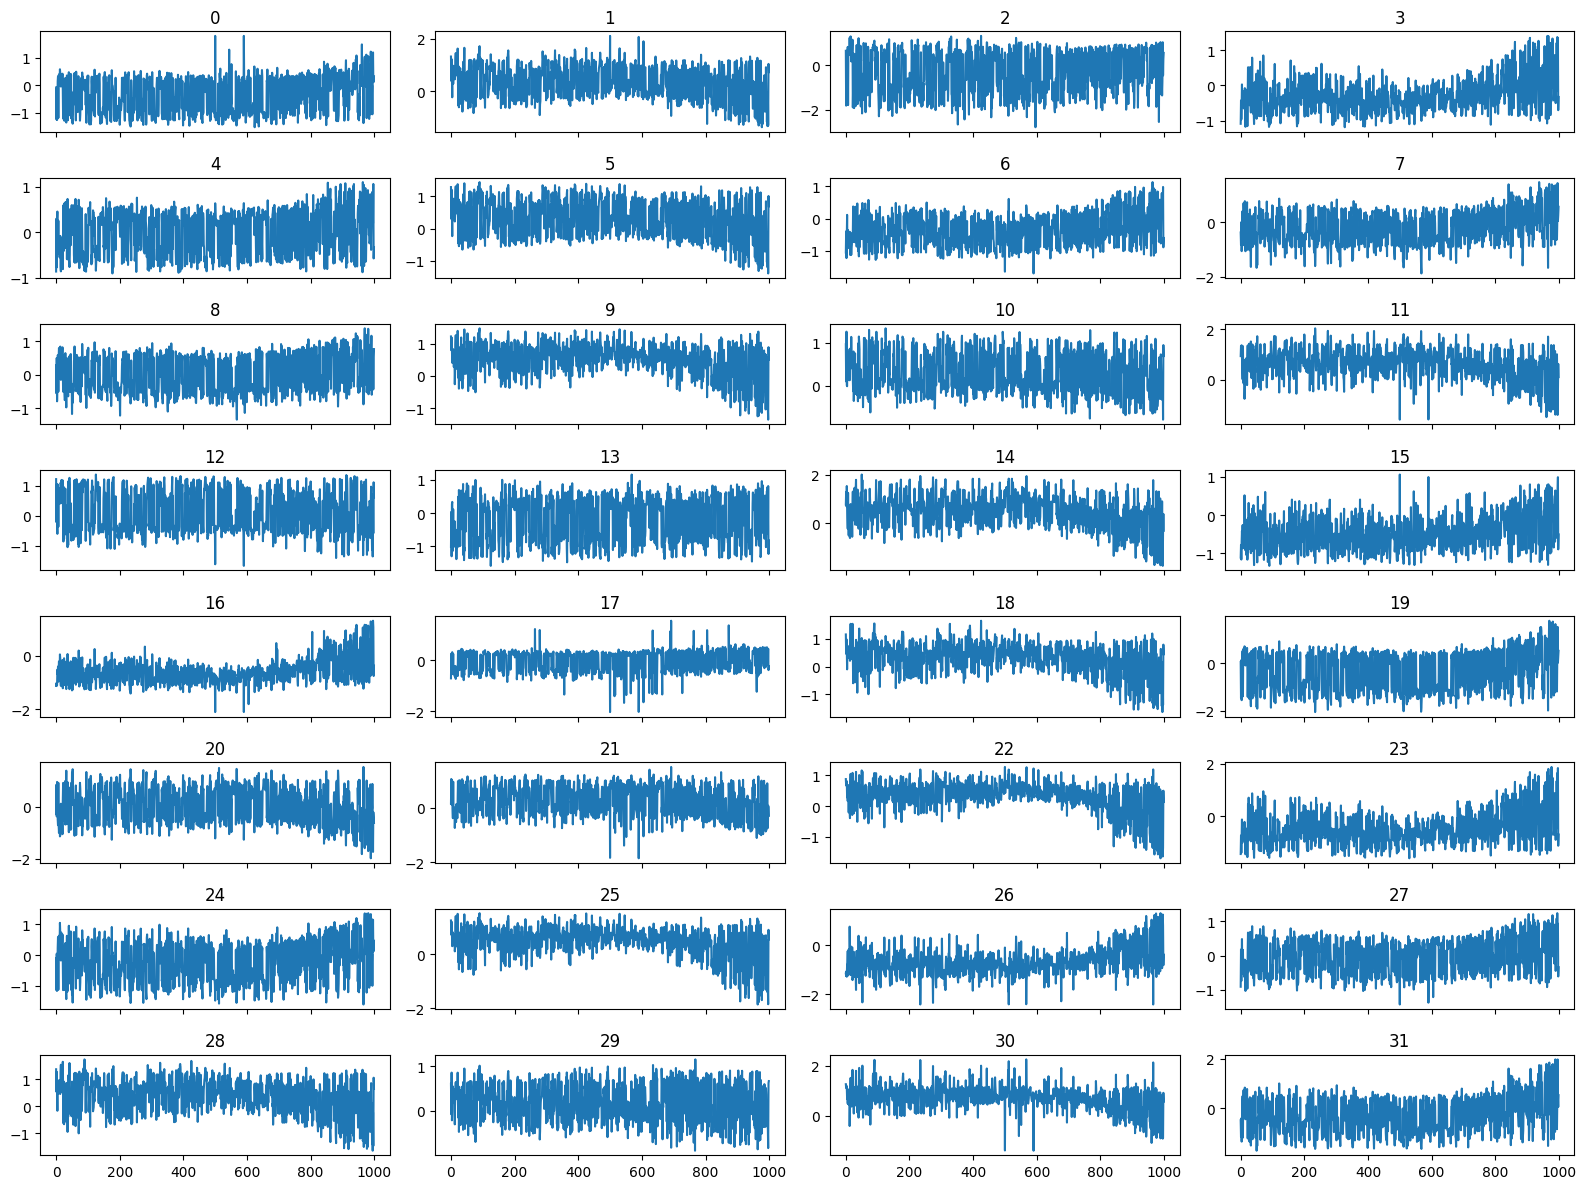

In [6]:
seq_idx = 0
fig, axes = plt.subplots(8, 4, figsize=(16, 12), sharex=True)
sample = df[df['seq_ix'] == seq_idx]
for col  in df.columns[3:]:
    col_idx = int(col)
    i, j = divmod(col_idx, 4)
    ax = axes[i, j]
    ax.plot(range(len(sample)), sample[col], label=col)
    ax.set_title(col)
plt.tight_layout()

#### First sequence ACF

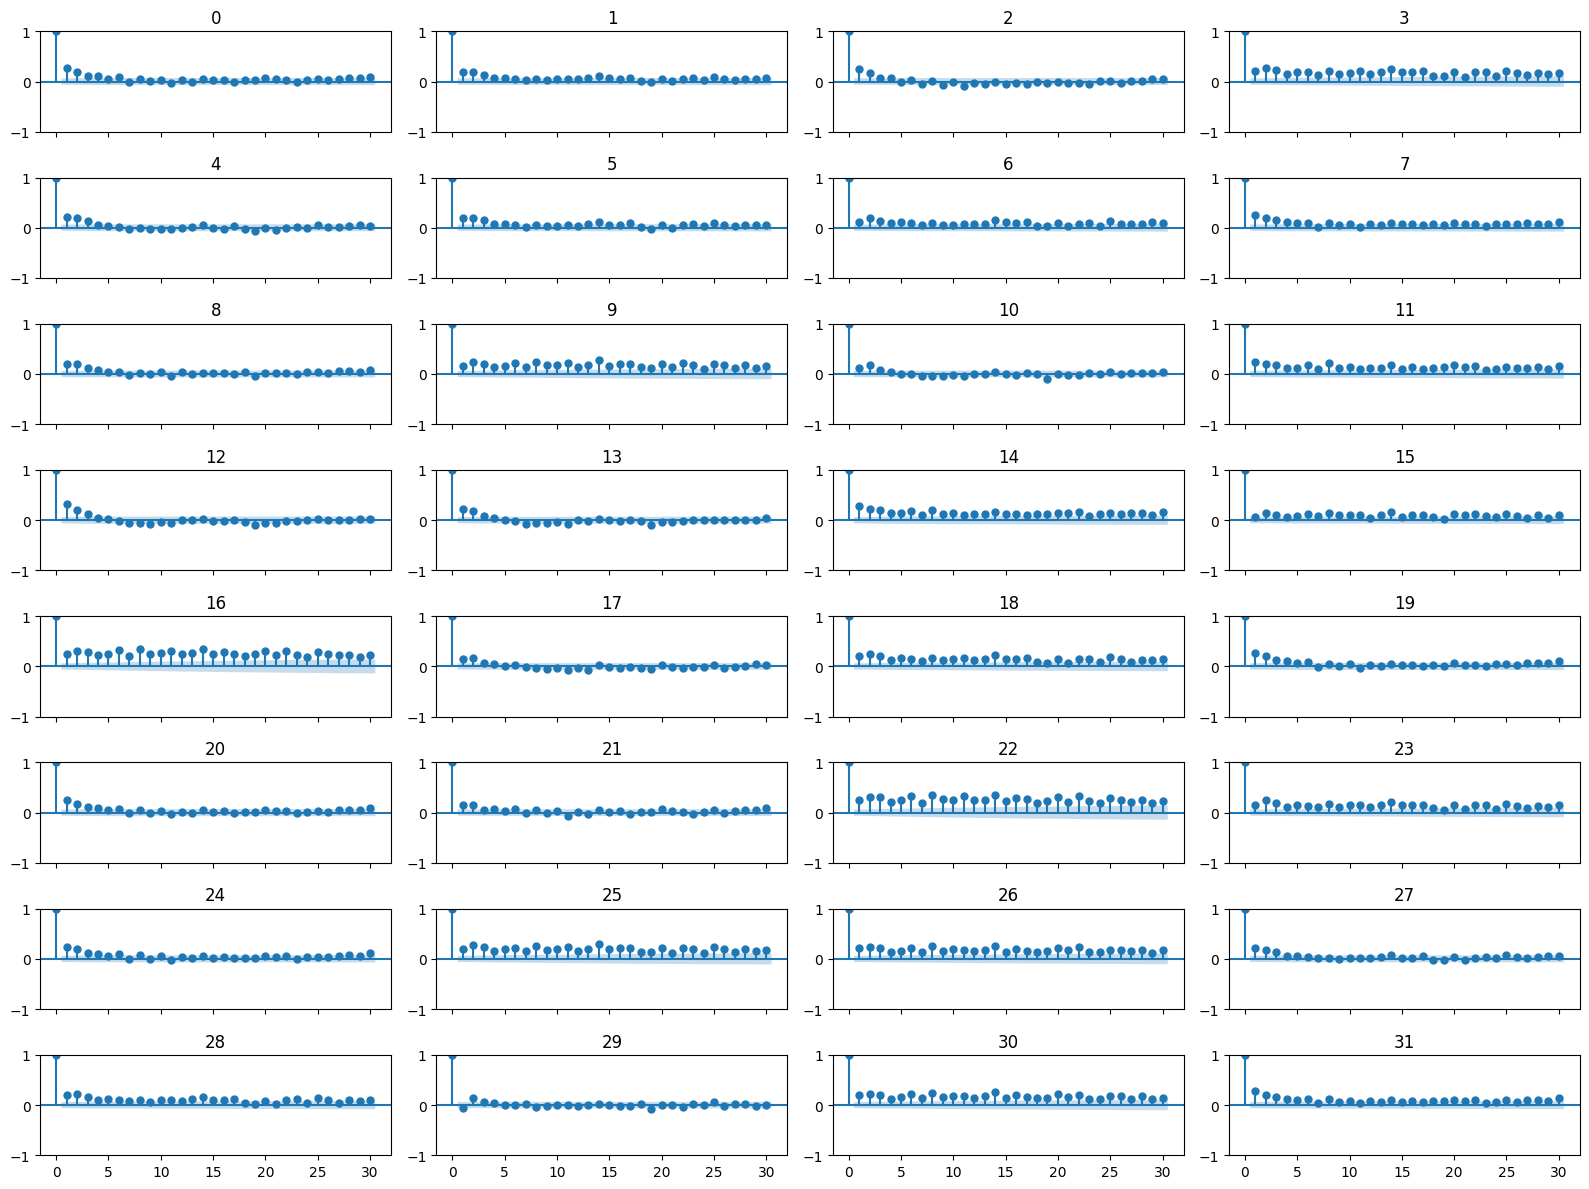

In [7]:
seq_idx = 0
fig, axes = plt.subplots(8, 4, figsize=(16, 12), sharex=True)
sample = df[df['seq_ix'] == seq_idx]
for col  in df.columns[3:]:
    col_idx = int(col)
    i, j = divmod(col_idx, 4)
    ax = axes[i, j]
    plot_acf(sample[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()

#### Group by seq_ix, compute features median, flatten and plot histogram

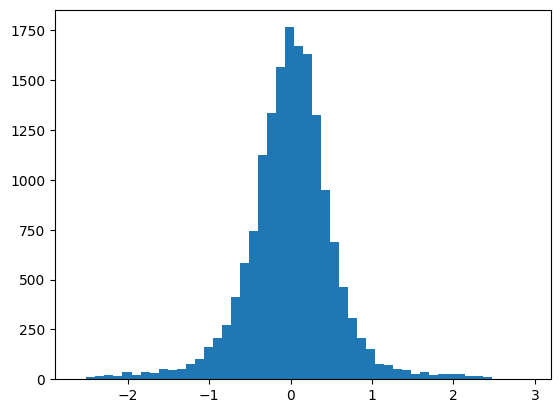

In [8]:
feature_cols = [str(i) for i in range(32)]
_ = plt.hist(
    df.groupby('seq_ix')[feature_cols].median().values.flatten(),
    bins=50
)

#### Summary

- We have 517 sequences, each with 1000 time steps
- No missing values
- It seems that most features are actually centered around 0
- No strong autocorrelation (at least for the first sequence)